In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


In [5]:
# Menentukan Variabel Kasus
#Sensor kelembaban
Kelembaban = np.arange(0, 80, 1)

#Sensor cahaya
Cahaya = np.arange(0, 80, 1)

#Sensor suhu
Suhu = np.arange(0, 80, 1)

#Penyiram tanaman
Penyiraman = np.arange(0, 80, 1)

#servo pot
Penutup = np.arange(0, 80, 1)


In [6]:

# Menentukan Range Himpunan Fuzzy

#Sensor kelembaban
Kelembaban_Basah = fuzz.trapmf(Kelembaban, [0, 0, 10, 50])
Kelembaban_Kering = fuzz.trapmf(Kelembaban,[10, 50, 80, 80])

#Sensor cahaya
Cahaya_Terang = fuzz.trapmf(Cahaya, [0, 0, 10, 50])
Cahaya_Gelap = fuzz.trapmf(Cahaya, [10, 50, 80, 80])

#Sensor suhu
Suhu_Panas = fuzz.trapmf(Suhu, [0, 0, 10, 50])
Suhu_Dingin = fuzz.trapmf (Suhu, [10, 50, 80, 80])

#Penyiram tanaman
Penyiraman_tidak = fuzz.trapmf (Penyiraman, [0, 0, 10, 50])
Penyiraman_iya = fuzz.trapmf (Penyiraman, [10, 60, 80, 80])

#servo pot
Penutup_terbuka = fuzz.trapmf (Penutup, [0, 0, 10, 50])
Penutup_tertutup = fuzz.trapmf (Penutup, [10, 60, 80, 80])



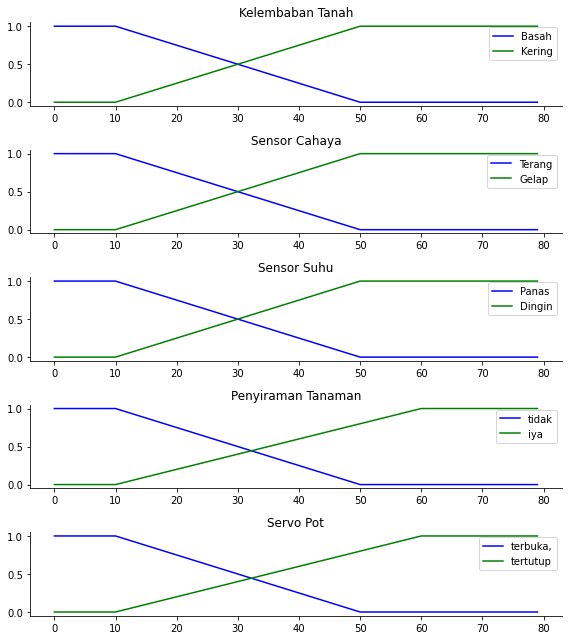

In [7]:
# Membuat Grafik Himpunan Fuzzy
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=5, figsize=(8,9))

ax0.plot(Kelembaban, Kelembaban_Basah, 'b', linewidth=1.5, label='Basah')
ax0.plot(Kelembaban, Kelembaban_Kering, 'g', linewidth=1.5, label='Kering')

ax0.set_title('Kelembaban Tanah')
ax0.legend()

ax1.plot(Cahaya, Cahaya_Terang, 'b', linewidth=1.5, label='Terang')
ax1.plot(Cahaya, Cahaya_Gelap, 'g', linewidth=1.5, label='Gelap')

ax1.set_title('Sensor Cahaya')
ax1.legend()

ax2.plot(Suhu, Suhu_Panas, 'b', linewidth=1.5, label='Panas')
ax2.plot(Suhu, Suhu_Dingin, 'g', linewidth=1.5, label='Dingin')

ax2.set_title('Sensor Suhu')
ax2.legend()

ax3.plot(Penyiraman, Penyiraman_tidak, 'b', linewidth=1.5, label='tidak')
ax3.plot(Penyiraman, Penyiraman_iya, 'g', linewidth=1.5, label='iya')

ax3.set_title('Penyiraman Tanaman')
ax3.legend()

ax4.plot(Penutup, Penutup_terbuka, 'b', linewidth=1.5, label='terbuka,')
ax4.plot(Penutup, Penutup_tertutup, 'g', linewidth=1.5, label='tertutup')

ax4.set_title('Servo Pot')
ax4.legend()


for ax in (ax0, ax1, ax2, ax3, ax4):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    plt.tight_layout()


In [8]:
# Mengimput Nilai Kasus
SKT = 55
SU = 29
SCH = 50



In [9]:
# Menentukan Rule Base
"""
•R1, Jika kelembaban tanah basah, cahaya terang DAN suhu panas  maka kecepatan penyiraman tanaman = 0 
•R2, Jika kelembaban tanah basah, cahaya terang DAN suhu dingin maka kecepatan penyiraman tanaman = 10*cahaya+100
•R3, Jika kelembaban tanah basah, cahaya gelap DAN  suhu panas maka kecepatan penyiraman tanaman = 10*cahaya+200
•R4, Jika kelembaban tanah basah, cahaya gelap DAN  suhu dingin maka kecepatan penyiraman tanaman = 10*cahaya+300
•R5, JJika kelembaban tanah kering, cahaya terang DAN suhu panas maka kecepatan penyiraman tanaman = 5*cahaya+2*suhu
•R6, JJika kelembaban tanah kering, cahaya terang DAN suhu dingin maka kecepatan penyiraman tanaman = 5*cahaya+4*suhu+100
•R7, JJika kelembaban tanah kering, cahaya gelap DAN  suhu panas maka alat akan menyiram dan pot terbuka=5*cahaya+5*suhu+200
•R8, JJika kelembaban tanah kering, cahaya gelap DAN  suhu panasmaka alat akan menyiram dan pot terbuka=5*cahaya+6*suhu+300

Domain penyiraman:
Tidak --> (80-Z)/(80-20) = fmin; apred[i] = fmin; (80 - Z) = 60 * apred[i]; Z = 80 - (60 * apred[i])
Iya --> (Z-20)/(80-20) = fmin; apred[i] = fmin; (Z - 20) = 60 * apred[i]; Z = (60 * apred[i]) + 20
""";


In [10]:
# Menentukan Derajat Keanggotaan
a = []
a.append(fuzz.interp_membership(Kelembaban, Kelembaban_Basah, SKT))
a.append(fuzz.interp_membership(Kelembaban, Kelembaban_Kering, SKT))

b = []
b.append(fuzz.interp_membership(Suhu, Suhu_Dingin, SU))
b.append(fuzz.interp_membership(Suhu, Suhu_Panas, SU))

c = []
c.append(fuzz.interp_membership(Cahaya, Cahaya_Terang, SCH))
c.append(fuzz.interp_membership(Cahaya, Cahaya_Gelap, SCH))


print("Derajat Keanggotaan Sensor Kelembaban")
if a[0] > 0:
    print("basah: "+str(a[0]))
if a[1] > 0:
    print("kering: "+str(a[1]))

print("Derajat Keanggotaan Sensor Suhu")
if b[0] > 0:
    print("panas: "+str(b[0]))
if b[1] > 0:
    print("dingin: "+str(b[1]))

print("Derajat Keanggotaan Sensor Cahaya ")
if c[0] > 0:
    print("terang: "+str(c[0]))
if c[1] > 0:
    print("gelap: "+str(c[1]))


Derajat Keanggotaan Sensor Kelembaban
kering: 1.0
Derajat Keanggotaan Sensor Suhu
panas: 0.475
dingin: 0.525
Derajat Keanggotaan Sensor Cahaya 
gelap: 1.0


In [17]:


# Memodelkan Rule Base dan Inferensi Mamdani

x1 = np.fmin(a[0], b[0])
apred1 = np.fmin(x1, c[0])
print("Rendah, Nilai apred1 = ", apred1)
z1 = 0
print("Nilai z1 = ", z1)

x2 = np.fmin(a[0], b[0])
apred2 = np.fmin(x2, c[1])
print("Rendah, Nilai apred2 = ", apred2)
z2 = 10*50+100
print("Nilai z2 = ", z2)

x3 = np.fmin(a[0], b[1])
apred3 = np.fmin(x3, c[0])
print("Rendah, Nilai apred3 = ", apred3)
z3 = 10*50+200
print("Nilai z3 = ", z3)

x4 = np.fmin(a[0], b[1])
apred4 = np.fmin(x4, c[1])
print("Tinggi, Nilai apred4 = ", apred4)
z4 = 10*50+300
print("Nilai z4 = ", z4)

x5 = np.fmin(a[1], b[0])
apred5 = np.fmin(x5, c[0])
print("Rendah, Nilai apred5 = ", apred5)
z5 =  5*50+2*29
print("Nilai z5 = ", z5)

x6 = np.fmin(a[1], b[0])
apred6 = np.fmin(x6, c[1])
print("Tinggi, Nilai apred6 = ", apred6)
z6 = 5*50+4*2+100
print("Nilai z6 = ", z6)

x7 = np.fmin(a[1], b[1])
apred7 = np.fmin(x7, c[0])
print("Tinggi, Nilai apred7 = ", apred7)
z7 = 5*50+5*29+200
print("Nilai z7 = ", z7)

x8 = np.fmin(a[1], b[1])
apred8 = np.fmin(x8, c[1])
print("Tinggi, Nilai apred8 = ", apred8)
z8 = 5*50+6*29+300
print("Nilai z8 = ", z8)

Nilai_rendah=np.fmax(np.fmax(apred1, apred2), np.fmax(apred3, apred5))
Nilai_tinggi=np.fmax(np.fmax(apred4, apred6), np.fmax(apred7, apred8))
print('Penyiraman Tanaman')
print('Tidak = ', Nilai_rendah)
print('Iya = ', Nilai_tinggi)


Rendah, Nilai apred1 =  0.0
Nilai z1 =  0
Rendah, Nilai apred2 =  0.0
Nilai z2 =  600
Rendah, Nilai apred3 =  0.0
Nilai z3 =  700
Tinggi, Nilai apred4 =  0.0
Nilai z4 =  800
Rendah, Nilai apred5 =  0.0
Nilai z5 =  308
Tinggi, Nilai apred6 =  0.475
Nilai z6 =  358
Tinggi, Nilai apred7 =  0.0
Nilai z7 =  595
Tinggi, Nilai apred8 =  0.525
Nilai z8 =  724
Penyiraman Tanaman
Tidak =  0.0
Iya =  0.525


In [10]:
((0*0)+(0*600)+(0*700)+(0*800)+(0*308)+(0.475*358)+(0*595)+(0.525*724))/(0+0+0+0+0+0.475+0+0.525)

550.15